# Initial Steps

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\1111\Dehire\Wooden\cleaned_monthly_wooden_data.csv", parse_dates=['date'])
df = df.set_index('date')
df

quantity
date                
2019-09-01     21050
2019-10-01     34121
2019-11-01     30100
2019-12-01     52396
2020-01-01     35979
2020-02-01     33208
2020-03-01     51330
2020-04-01     43714
2020-05-01     45012
2020-06-01     88314
2020-07-01     86007
2020-08-01     79449
2020-09-01     75733
2020-10-01     88805
2020-11-01     84784
2020-12-01    107079
2021-01-01     90663
2021-02-01     87891
2021-03-01    106013
2021-04-01     98397
2021-05-01     99696
2021-06-01    142998
2021-07-01    140690
2021-08-01    134132
2021-09-01    130416
2021-10-01    143488
2021-11-01    139467
2021-12-01    161762
2022-01-01    145346
2022-02-01    142575
2022-03-01    160696
2022-04-01    153080
2022-05-01    154379
2022-06-01    197681
2022-07-01    195373
2022-08-01    188816
2022-09-01    185099
2022-10-01    198171
2022-11-01    194150

In [3]:
df = df.rename({'quantity': 'count'}, axis = 1)
df

count
date              
2019-09-01   21050
2019-10-01   34121
2019-11-01   30100
2019-12-01   52396
2020-01-01   35979
2020-02-01   33208
2020-03-01   51330
2020-04-01   43714
2020-05-01   45012
2020-06-01   88314
2020-07-01   86007
2020-08-01   79449
2020-09-01   75733
2020-10-01   88805
2020-11-01   84784
2020-12-01  107079
2021-01-01   90663
2021-02-01   87891
2021-03-01  106013
2021-04-01   98397
2021-05-01   99696
2021-06-01  142998
2021-07-01  140690
2021-08-01  134132
2021-09-01  130416
2021-10-01  143488
2021-11-01  139467
2021-12-01  161762
2022-01-01  145346
2022-02-01  142575
2022-03-01  160696
2022-04-01  153080
2022-05-01  154379
2022-06-01  197681
2022-07-01  195373
2022-08-01  188816
2022-09-01  185099
2022-10-01  198171
2022-11-01  194150

In [4]:
train=df.head(24)
test=df.tail(12)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [7]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [8]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [9]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.         0.10718503 0.07421196 0.25704399 0.12242103 0.09969823
 0.24830256 0.18584971 0.19649359 0.55157936 0.53266146 0.47888444]
Predict this y: 
 [[0.44841244]]


In [10]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [12]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(generator,epochs=50)

Epoch 1/50
12/12 [==============================] - 3s 13ms/step - loss: 0.3698
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1196
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 5/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0123
Epoch 7/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0103
Epoch 8/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 9/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 10/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 11/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0122
Epoch 12/50
12/12 [==============================] - 0s 13ms/step - loss: 0.0102
Epoch 13/50
12/12 [===========================

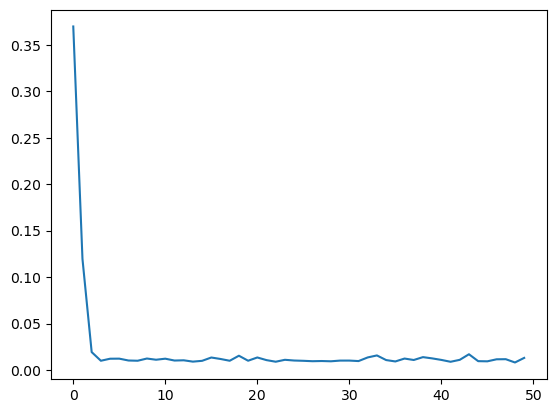

In [15]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [16]:
last_train_batch = scaled_train[-12:]

In [17]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [18]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 450ms/step


array([[0.929137]], dtype=float32)

In [19]:
scaled_test[0]

array([1.15386886])

In [20]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


In [21]:
test_predictions

[array([0.929137], dtype=float32),
 array([0.98671305], dtype=float32),
 array([1.0427479], dtype=float32),
 array([1.1061505], dtype=float32),
 array([1.1484994], dtype=float32),
 array([1.225765], dtype=float32),
 array([1.3179818], dtype=float32),
 array([1.4151579], dtype=float32),
 array([1.5449694], dtype=float32),
 array([1.6958979], dtype=float32),
 array([1.7995514], dtype=float32),
 array([1.933488], dtype=float32)]

In [22]:
test.head()

count
date              
2021-12-01  161762
2022-01-01  145346
2022-02-01  142575
2022-03-01  160696
2022-04-01  153080

In [23]:
true_predictions = scaler.inverse_transform(test_predictions)

In [24]:
test['Predictions'] = true_predictions

C:\Users\hp\AppData\Local\Temp\ipykernel_16052\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<AxesSubplot:xlabel='date'>

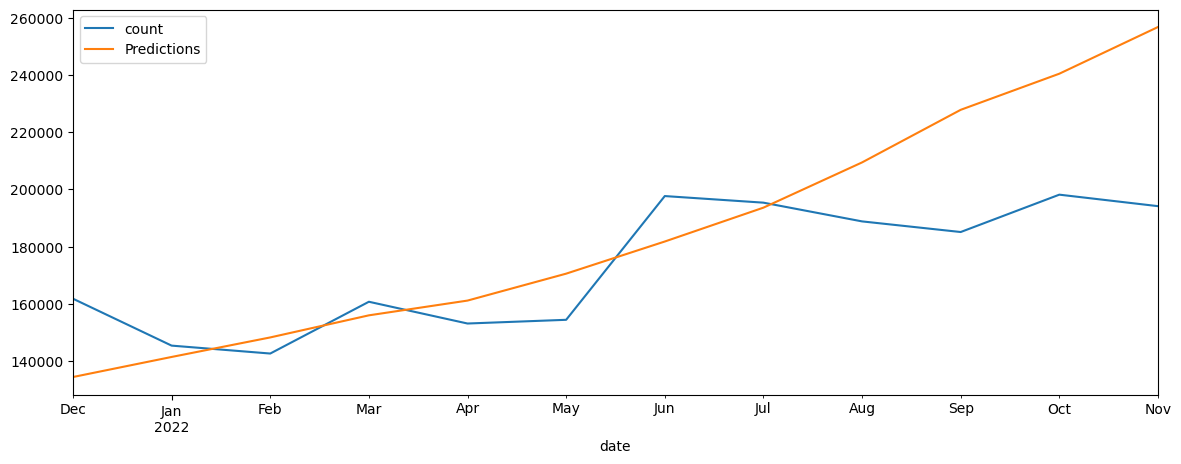

In [25]:
test.plot(figsize=(14,5))   

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['count'],test['Predictions']))
print(rmse)

27955.944121197706
